In [2]:
import logging
import os
import datetime
# import IPython
# import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical ,Sequence
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Dropout, LSTM, Dense, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adadelta, Nadam ,Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard

import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers.convolutional import Conv1D    

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_percentage_error

from datetime import datetime
from datetime import timedelta
import datetime as dt 
from google.cloud import storage
from google.cloud import bigquery
from google.oauth2 import service_account

import joblib  
import load_data
import prepro
import modelado

from datetime import datetime as dtt
from datetime import timedelta
import datetime
import time
import seaborn as sns

2023-07-09 03:07:01.839360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-09 03:07:01.839405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
z_scaler = preprocessing.StandardScaler()
client = bigquery.Client()

#client = bigquery.Client()

#PROJECT_ID = 'zmx-sugar-sales-ml-d'
PROJECT_ID = 'timeseries-387916'


# ### Cargar datos

# In[2]:


data_sniim_estado=load_data.load_data_sniim()
#data_precio_bh_estado=load_data.load_data_bh()

In [15]:
len(data_sniim_estado['Estado'].unique())

16

In [7]:
data_sniim_estado.head(10)

,Fecha,Estado,Valor_Promedio_SNIIM
0,2019-06-07,Guanajuato,755.0
1,2019-06-10,Guanajuato,765.0
2,2019-06-11,Guanajuato,765.0
3,2019-06-12,Guanajuato,765.0
4,2019-06-13,Guanajuato,765.0
48,2019-06-07,Estado de México,752.0
49,2020-05-28,Estado de México,897.5
50,2020-05-29,Estado de México,897.5
51,2020-07-01,Estado de México,900.0
52,2020-07-02,Estado de México,887.5


In [13]:
data_sniim_estado.shape,  48597*3

((48597, 3), 145791)

In [ ]:
data_sniim_estado['Fecha'].min()

In [ ]:
#df=(data_sniim_estado.loc[data_sniim_estado['Estado'] == 'Puebla'])

In [ ]:
#df.sort_values(by=['Fecha'])

In [ ]:
#testY1.mean() , trainY1.mean()

In [ ]:
# # ### Feature engineering

# # In[3]:


# data_precio_bh_estado["Estado"]= data_precio_bh_estado["Estado"].str.upper()
# data_precio_bh_estado["Estado"] = data_precio_bh_estado["Estado"].replace("SAN LUIS POTOSI", "SLP")
# data_precio_bh_estado["Estado"] = data_precio_bh_estado["Estado"].replace("NUEVO LEÓN", "NUEVO LEON")

# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].str.upper()
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("SAN LUIS POTOSI", "SLP")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("NUEVO LEÓN", "NUEVO LEON")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("ESTADO DE MÉXICO", "ESTADO DE MEXICO")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("MICHOACÁN", "MICHOACAN")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("QUERÉTARO", "QUERETARO")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("MICHOACÁN", "MICHOACAN")
# data_sniim_estado["Estado"] = data_sniim_estado["Estado"].replace("CIUDAD DE MÉXICO", "CIUDAD DE MEXICO")

# data_sniim_estado['Fecha']=data_sniim_estado['Fecha'].astype(str)
# data_precio_bh_estado['Fecha']=data_precio_bh_estado['Fecha'].astype(str)


# dfM=pd.merge(data_precio_bh_estado,data_sniim_estado,how='left',on=["Fecha","Estado"])
# dfM=dfM.dropna()
# #logging.info('dfM')

In [ ]:
data_sniim_estado.columns

In [ ]:
trainX1.shape, testX1.shape, trainY1.shape, testY1.shape

In [6]:
data_sniim_estado=data_sniim_estado.dropna()

In [ ]:
data_sniim_estado.isnull().sum()

In [ ]:
sns.distplot(testY1), sns.distplot(trainY1)

In [ ]:
sns.distplot(trainY1)

In [ ]:
data_sniim_estado

In [4]:


# In[16]:


#bh= dfM[["Fecha","Ingenio","Precio_Base_Promedio"]].copy()
#sniim = dfM[["Fecha","Ingenio","Valor_Promedio_SNIIM"]].copy()

# #### Preprocesamiento

# In[21]:


#a=prepro.funcion(bh,"Ingenio","Fecha")
b=prepro.funcion(data_sniim_estado,"Estado","Fecha")

scaler = b[3]

#trainX, testX, trainY, testY = prepro.splitdata(a)
trainX1, testX1, trainY1, testY1 = prepro.splitdata(b)

#print(len(a[1]) , trainX.shape , trainY.shape,testX.shape , testY.shape)

# rn1= modelado.red_neuronal1()
# rn2= modelado.red_neuronal1()

# c=rn1.input
# d=rn2.input

#combinedInput = concatenate([rn1.output, rn2.output])


index_total1 [[ 0]
 [ 0]
 [ 0]
 ...
 [15]
 [15]
 [15]]


# LSTM

In [5]:
inicio = time.time()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = modelado.lstm()

history = modelado.compile_and_fit(model,[trainX1],trainY1,[testX1],testY1,32,50,0.0001)
fin = time.time()
print(fin-inicio)

2023-07-07 20:48:18.170058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-07 20:48:18.170101: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-07 20:48:18.170125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (scraping): /proc/driver/nvidia/version does not exist
2023-07-07 20:48:18.170406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
564/564 [==============================] - 6s 8ms/step - loss: 0.6217 - mean_absolute_error: 0.6064 - MeanAbsolutePercentageError: 94.3319 - val_loss: 0.1766 - val_mean_absolute_error: 0.3017 - val_MeanAbsolutePercentageError: 73.8797
Epoch 2/50
564/564 [==============================] - 4s 7ms/step - loss: 0.2124 - mean_absolute_error: 0.3360 - MeanAbsolutePercentageError: 103.2539 - val_loss: 0.0953 - val_mean_absolute_error: 0.2252 - val_MeanAbsolutePercentageError: 59.6774
Epoch 3/50
564/564 [==============================] - 4s 8ms/step - loss: 0.1375 - mean_absolute_error: 0.2679 - MeanAbsolutePercentageError: 92.5610 - val_loss: 0.0651 - val_mean_absolute_error: 0.1882 - val_MeanAbsolutePercentageError: 60.4096
Epoch 4/50
564/564 [==============================] - 4s 7ms/step - loss: 0.1034 - mean_absolute_error: 0.2327 - MeanAbsolutePercentageError: 86.5983 - val_loss: 0.0550 - val_mean_absolute_error: 0.1709 - val_MeanAbsolutePercentageError: 64.3129
Epoch 5/50
564/

In [6]:
print(fin-inicio)

205.90489029884338


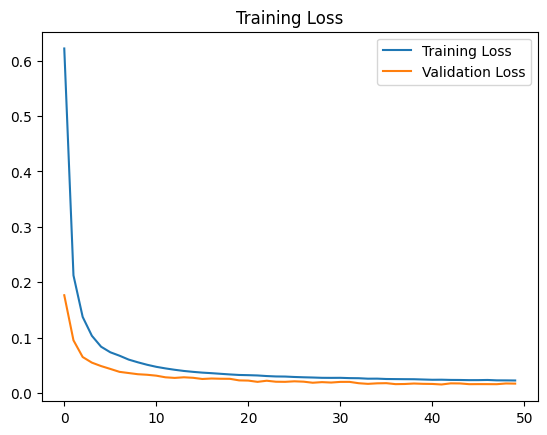

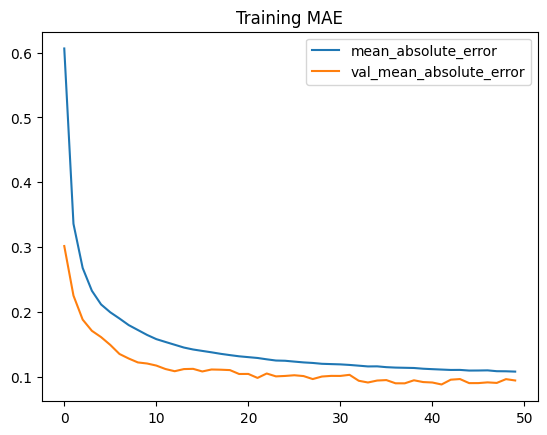

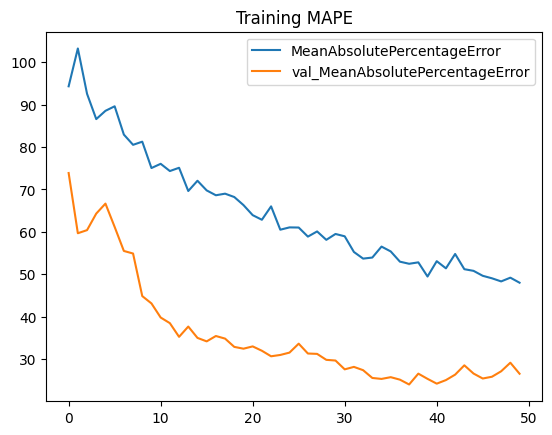

In [7]:
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title("Training Loss")
plt.legend()
plt.show()

plt.plot(history.history["mean_absolute_error"], label='mean_absolute_error')
plt.plot(history.history["val_mean_absolute_error"], label='val_mean_absolute_error')
plt.title("Training MAE")
plt.legend()
plt.show()

plt.plot(history.history["MeanAbsolutePercentageError"], label='MeanAbsolutePercentageError')
plt.plot(history.history["val_MeanAbsolutePercentageError"], label='val_MeanAbsolutePercentageError')
plt.title("Training MAPE")
plt.legend()
plt.show()

# MLP 3 LAYERS

In [8]:
# MLP 3 CAPAS
inicio = time.time()
# model1 = Sequential()
# model1.add(Dense(64, activation='relu', input_shape=(6,)))  # Capa densa con 64 unidades y función de activación ReLU
# model1.add(Dense(32, activation='relu'))  # Capa densa con 32 unidades y función de activación ReLU
# model1.add(Dense(16, activation='relu'))  # Capa densa con 32 unidades y función de activación ReLU
# model1.add(Dense(1))  # Capa de salida con una unidad lineal

model1 = modelado.mlp3()

history = modelado.compile_and_fit(model1,[trainX1],trainY1,[testX1],testY1,32,50,0.0001)

fin = time.time()
print(fin-inicio)

Epoch 1/50
564/564 [==============================] - 2s 2ms/step - loss: 0.3729 - mean_absolute_error: 0.3888 - MeanAbsolutePercentageError: 55.0765 - val_loss: 0.0975 - val_mean_absolute_error: 0.2023 - val_MeanAbsolutePercentageError: 44.1854
Epoch 2/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0186 - mean_absolute_error: 0.0781 - MeanAbsolutePercentageError: 38.9993 - val_loss: 0.0043 - val_mean_absolute_error: 0.0422 - val_MeanAbsolutePercentageError: 23.3622
Epoch 3/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0352 - MeanAbsolutePercentageError: 21.6838 - val_loss: 0.0029 - val_mean_absolute_error: 0.0293 - val_MeanAbsolutePercentageError: 16.3261
Epoch 4/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0277 - MeanAbsolutePercentageError: 16.9338 - val_loss: 0.0025 - val_mean_absolute_error: 0.0252 - val_MeanAbsolutePercentageError: 13.6576
Epoch 5/50
564/5

In [9]:
print(fin-inicio)

55.553030490875244


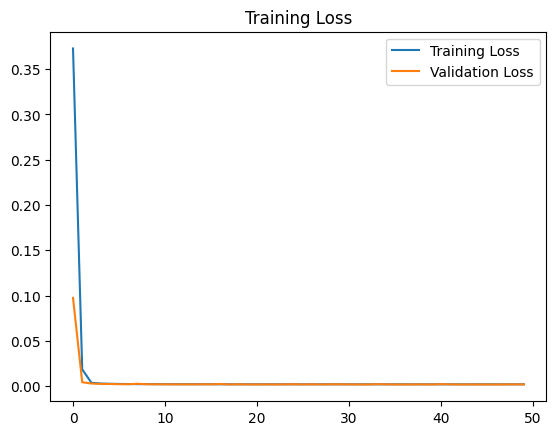

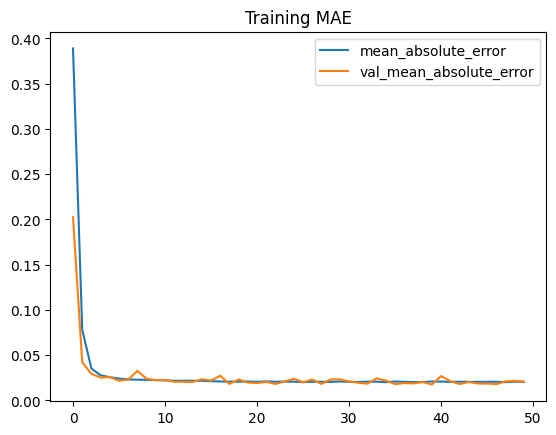

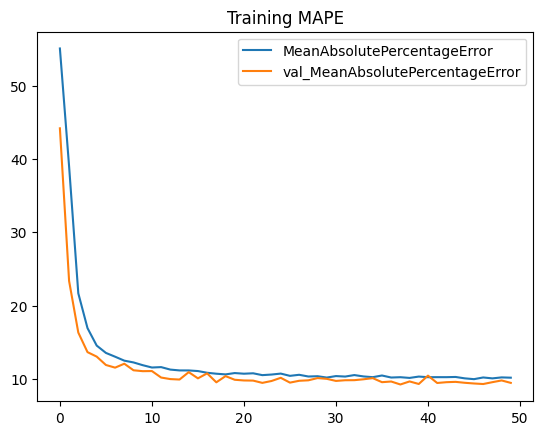

In [10]:
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title("Training Loss")
plt.legend()
plt.show()

plt.plot(history.history["mean_absolute_error"], label='mean_absolute_error')
plt.plot(history.history["val_mean_absolute_error"], label='val_mean_absolute_error')
plt.title("Training MAE")
plt.legend()
plt.show()

plt.plot(history.history["MeanAbsolutePercentageError"], label='MeanAbsolutePercentageError')
plt.plot(history.history["val_MeanAbsolutePercentageError"], label='val_MeanAbsolutePercentageError')
plt.title("Training MAPE")
plt.legend()
plt.show()

# RNN 2 LAYERS

In [17]:
# RNN 2 CAPAS OCULTAS
inicio = time.time()
# from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
# model3 = Sequential()
# model3.add(SimpleRNN(64, activation='relu', input_shape=(6, 1)))  # Capa RNN con 64 unidades y función de activación ReLU
# model3.add(Dropout(0.25))  # Dropout con tasa de retención de 0.25
# model3.add(Dense(32, activation='relu'))  # Capa densa con 32 unidades y función de activación ReLU
# model3.add(Dropout(0.25))  # Dropout con tasa de retención de 0.25
# model3.add(Dense(1))  # Capa de salida

model3 = modelado.rnn()

history = modelado.compile_and_fit(model3,[trainX1],trainY1,[testX1],testY1,32,50,0.0001)
fin = time.time()
print(fin-inicio)

Epoch 1/50
564/564 [==============================] - 3s 4ms/step - loss: 0.2059 - mean_absolute_error: 0.3069 - MeanAbsolutePercentageError: 49.4327 - val_loss: 0.0065 - val_mean_absolute_error: 0.0518 - val_MeanAbsolutePercentageError: 15.6707
Epoch 2/50
564/564 [==============================] - 2s 4ms/step - loss: 0.0757 - mean_absolute_error: 0.1900 - MeanAbsolutePercentageError: 33.6221 - val_loss: 0.0057 - val_mean_absolute_error: 0.0481 - val_MeanAbsolutePercentageError: 14.1474
Epoch 3/50
564/564 [==============================] - 2s 4ms/step - loss: 0.0605 - mean_absolute_error: 0.1701 - MeanAbsolutePercentageError: 31.0328 - val_loss: 0.0033 - val_mean_absolute_error: 0.0360 - val_MeanAbsolutePercentageError: 11.6358
Epoch 4/50
564/564 [==============================] - 2s 4ms/step - loss: 0.0520 - mean_absolute_error: 0.1568 - MeanAbsolutePercentageError: 27.7515 - val_loss: 0.0049 - val_mean_absolute_error: 0.0487 - val_MeanAbsolutePercentageError: 12.7615
Epoch 5/50
564/5

In [18]:
print(fin-inicio)

142.8725233078003


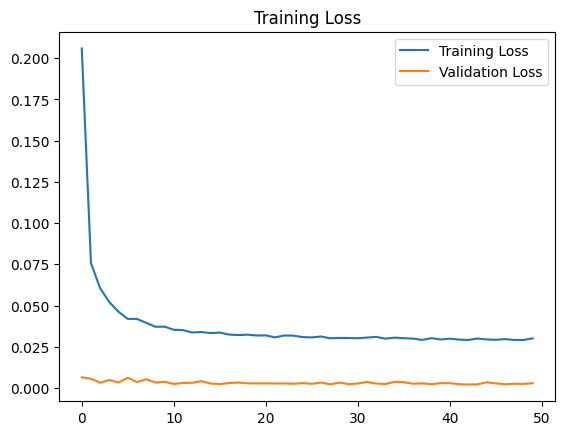

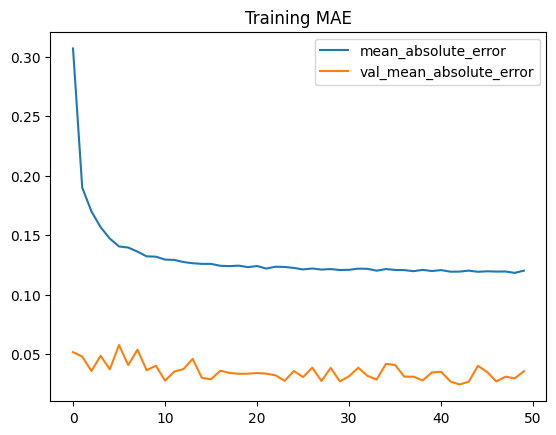

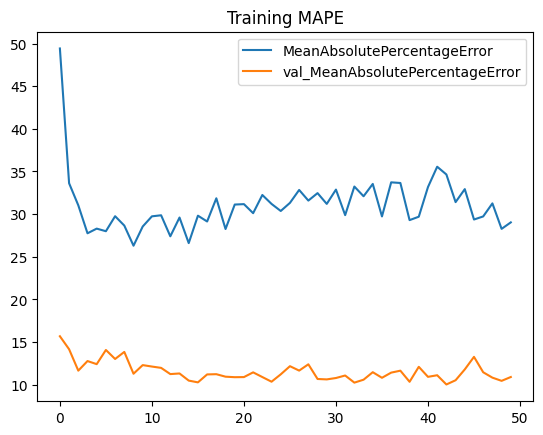

In [19]:
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title("Training Loss")
plt.legend()
plt.show()

plt.plot(history.history["mean_absolute_error"], label='mean_absolute_error')
plt.plot(history.history["val_mean_absolute_error"], label='val_mean_absolute_error')
plt.title("Training MAE")
plt.legend()
plt.show()

plt.plot(history.history["MeanAbsolutePercentageError"], label='MeanAbsolutePercentageError')
plt.plot(history.history["val_MeanAbsolutePercentageError"], label='val_MeanAbsolutePercentageError')
plt.title("Training MAPE")
plt.legend()
plt.show()

# MLP 2 LAYERS

In [14]:
# MLP 2 CAPAS
inicio = time.time()
# model1 = Sequential()
# model1.add(Dense(64, activation='relu', input_shape=(6,)))  # Capa densa con 64 unidades y función de activación ReLU
# model1.add(Dense(32, activation='relu'))  # Capa densa con 32 unidades y función de activación ReLU
# model1.add(Dense(1))  # Capa de salida con una unidad lineal

model1 = modelado.mlp2()
history = modelado.compile_and_fit(model1,[trainX1],trainY1,[testX1],testY1,32,50,0.0001)

fin = time.time()
print(fin-inicio)

# # Compilar el modelo
# model1.compile(optimizer='adam', loss='mean_squared_error')

# # Entrenar el modelo
# model1.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluar el modelo
# loss = model.evaluate(X_test, y_test)

# # Realizar predicciones
# predictions = model.predict(X_test)

Epoch 1/50
564/564 [==============================] - 1s 2ms/step - loss: 0.2521 - mean_absolute_error: 0.2813 - MeanAbsolutePercentageError: 49.5506 - val_loss: 0.0056 - val_mean_absolute_error: 0.0498 - val_MeanAbsolutePercentageError: 32.7949
Epoch 2/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0438 - MeanAbsolutePercentageError: 29.0619 - val_loss: 0.0039 - val_mean_absolute_error: 0.0374 - val_MeanAbsolutePercentageError: 21.5204
Epoch 3/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0335 - MeanAbsolutePercentageError: 19.8937 - val_loss: 0.0032 - val_mean_absolute_error: 0.0297 - val_MeanAbsolutePercentageError: 15.9468
Epoch 4/50
564/564 [==============================] - 1s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0289 - MeanAbsolutePercentageError: 15.8598 - val_loss: 0.0028 - val_mean_absolute_error: 0.0280 - val_MeanAbsolutePercentageError: 13.7703
Epoch 5/50
564/5

In [15]:
print(fin-inicio)

52.27434039115906


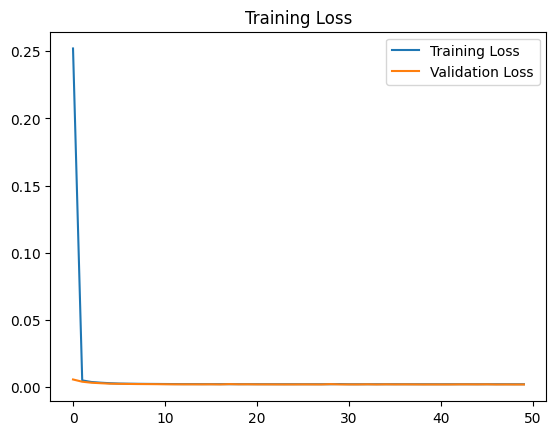

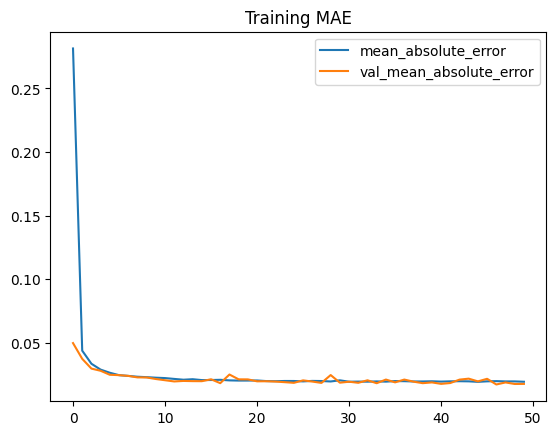

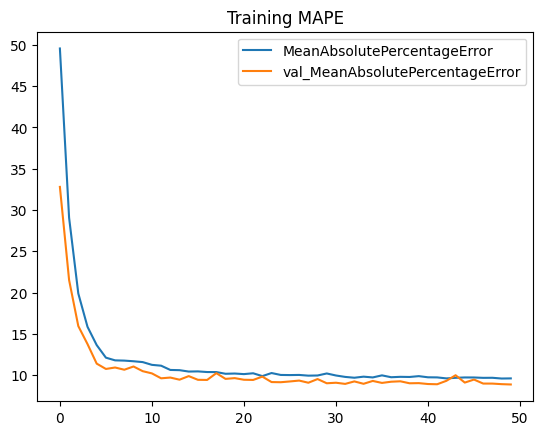

In [16]:
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title("Training Loss")
plt.legend()
plt.show()

plt.plot(history.history["mean_absolute_error"], label='mean_absolute_error')
plt.plot(history.history["val_mean_absolute_error"], label='val_mean_absolute_error')
plt.title("Training MAE")
plt.legend()
plt.show()

plt.plot(history.history["MeanAbsolutePercentageError"], label='MeanAbsolutePercentageError')
plt.plot(history.history["val_MeanAbsolutePercentageError"], label='val_MeanAbsolutePercentageError')
plt.title("Training MAPE")
plt.legend()
plt.show()

In [ ]:
p.shape, data_sniim_estado.columns

In [ ]:
o=list(data_sniim_estado['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor
l = {'2022-11-02',
    '2021-10-01',
'2021-10-04',
'2021-10-05',
'2021-10-06',
'2021-10-07',
'2021-10-08',
'2021-10-11',
'2021-10-12',
'2021-10-13',
'2021-10-14',
'2021-10-15',
'2021-10-18',
'2021-10-19',
'2021-10-20',
'2022-05-05'}

f=set(o) - set(l)
f=list(f)

# inferencia

In [ ]:
Fmax =load_data.load_data_bh()
Fmax["Fecha"]=Fmax["Fecha"].astype(str)
print(Fmax["Fecha"].max() , Fmax["Fecha"].min())

PRED = client.query(f""" SELECT * FROM {PROJECT_ID}.ml.prediction """).to_dataframe()
#PRED.columns

# In[25]:


o = set(Fmax["Fecha"].sort_values(ascending=False).unique()) - set(PRED["FechaEjecucion"].sort_values(ascending=False).unique()) #
l = {'2022-11-02',
    '2021-10-01',
'2021-10-04',
'2021-10-05',
'2021-10-06',
'2021-10-07',
'2021-10-08',
'2021-10-11',
'2021-10-12',
'2021-10-13',
'2021-10-14',
'2021-10-15',
'2021-10-18',
'2021-10-19',
'2021-10-20',
'2022-05-05'}

f=set(o) - set(l)
f=list(f)

f=set(f) & set(o)
f=list(f)

In [ ]:
o=list(data_sniim_estado['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor

In [ ]:
o[:len(o)-8]

In [ ]:
max(o) , min(o)

In [ ]:
o=list(data_sniim_estado['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor
o= o[:len(o)-8]
o = list(o)

In [ ]:
sorted(f, reverse=True)

In [ ]:
#o=list(bh['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor
o=list(data_sniim_estado['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor
o= o[:len(o)-8]
o = list(o)
for i in sorted(f, reverse=True):
    fecha = i
    if fecha in o:
        n=o.index(fecha)
        dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6 = o[n],o[n+1],o[n+2],o[n+3],o[n+4],o[n+5],o[n+6]
        listaF=[dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6]
        #bh1=bh.loc[bh['Fecha'].isin(listaF)]
        sniim1=data_sniim_estado.loc[data_sniim_estado['Fecha'].isin(listaF)]
        print('print',fecha)
        
        #a=prepro.funcion(bh1,"Ingenio","Fecha")
        b=prepro.funcion(sniim1,"Estado","Fecha")
        scaler = b[3]
        g=model.predict([b[1]])
        p=np.concatenate((b[1][:,-1].reshape(-1,1),g[:,:,0]), axis=1)
        p1=scaler.inverse_transform(p)

        dia0 = dtt.strptime(fecha, '%Y-%m-%d') 
        dia0 = dia0.strftime('%Y-%m-%d')

        dia1 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=1)
        dia1 = dia1.strftime('%Y-%m-%d')

        dia2 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=2)
        dia2 = dia2.strftime('%Y-%m-%d')

        dia3 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=3)
        dia3 = dia3.strftime('%Y-%m-%d')

        dia4 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=4)
        dia4 = dia4.strftime('%Y-%m-%d')

        dia5 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=5)
        dia5 = dia5.strftime('%Y-%m-%d')

        dia6 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=6)
        dia6 = dia6.strftime('%Y-%m-%d')
        ###############################
        d = b[4]
        result=np.concatenate((b[0].reshape(-1,1),p1), axis=1)
        df = pd.DataFrame(result,columns=["Estado",dia0,dia1,dia2,dia3,dia4,dia5,dia6])
        df['Estado'] = df['Estado'].astype(int)
        df.replace(d, inplace=True)

        df_final=df.melt(id_vars=["Estado"], var_name="Fecha", value_name="Valor") # 
        df_final["FechaEjecucion"] = dia0
        df_final = df_final[["Estado","Fecha","FechaEjecucion","Valor"]]

        ##comparativo = pd.merge(df_final, bh, how='left',on=["Fecha","Ingenio"] )
        #comparativo=comparativo.dropna()

        ##comparativo.to_gbq(f'{PROJECT_ID}.ml.comparativo', if_exists='append', project_id=f'{PROJECT_ID}')  # 
        df_final.to_gbq(f'{PROJECT_ID}.ml.prediction', if_exists='append', project_id=f'{PROJECT_ID}')  # 
        print("fecha",i)
    
    else:
        print("No encuentra fecha para predecir")

In [ ]:
o=list(bh['Fecha'].sort_values(ascending=False).unique()) #-> de mayor a menor
#o= o[:len(o)-8]
#o = list(o)
for i in f:
    fecha = i
    if fecha in o:
        n=o.index(fecha)
        dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6 = o[n],o[n+1],o[n+2],o[n+3],o[n+4],o[n+5],o[n+6]
        listaF=[dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6]
        bh1=bh.loc[bh['Fecha'].isin(listaF)]
        sniim1=sniim.loc[sniim['Fecha'].isin(listaF)]

        a=prepro.funcion(bh1,"Ingenio","Fecha")
        b=prepro.funcion(sniim1,"Ingenio","Fecha")
        scaler = a[3]
        g=model.predict([a[1],b[1]])
        p=np.concatenate((a[1][:,-1].reshape(-1,1),g[:,:,0]), axis=1)
        p1=scaler.inverse_transform(p)

        dia0 = dtt.strptime(fecha, '%Y-%m-%d') 
        dia0 = dia0.strftime('%Y-%m-%d')

        dia1 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=1)
        dia1 = dia1.strftime('%Y-%m-%d')

        dia2 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=2)
        dia2 = dia2.strftime('%Y-%m-%d')

        dia3 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=3)
        dia3 = dia3.strftime('%Y-%m-%d')

        dia4 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=4)
        dia4 = dia4.strftime('%Y-%m-%d')

        dia5 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=5)
        dia5 = dia5.strftime('%Y-%m-%d')

        dia6 = dtt.strptime(fecha, '%Y-%m-%d') + datetime.timedelta(days=6)
        dia6 = dia6.strftime('%Y-%m-%d')
        ###############################
        d = a[4]
        result=np.concatenate((a[0].reshape(-1,1),p1), axis=1)
        df = pd.DataFrame(result,columns=["Ingenio",dia0,dia1,dia2,dia3,dia4,dia5,dia6])
        df['Ingenio'] = df['Ingenio'].astype(int)
        df.replace(d, inplace=True)

        df_final=df.melt(id_vars=["Ingenio"], var_name="Fecha", value_name="Valor") # 
        df_final["FechaEjecucion"] = dia0
        df_final = df_final[["Ingenio","Fecha","FechaEjecucion","Valor"]]

        ##comparativo = pd.merge(df_final, bh, how='left',on=["Fecha","Ingenio"] )
        #comparativo=comparativo.dropna()

        ##comparativo.to_gbq(f'{PROJECT_ID}.ml.comparativo', if_exists='append', project_id=f'{PROJECT_ID}')  # 
        df_final.to_gbq(f'{PROJECT_ID}.ml.prediction', if_exists='append', project_id=f'{PROJECT_ID}')  # 
        print("fecha",i)
    
    else:
        print("No encuentra fecha para predecir")